In [40]:
import pandas as pd
valid_df = pd.read_csv("drive/MyDrive/00AI/sign_mnist_test.csv")
train_df = pd.read_csv("drive/MyDrive/00AI/sign_mnist_train.csv")

In [41]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [42]:
train_label = train_df['label']
valid_label = valid_df['label']

In [43]:
train_label

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

In [44]:
del train_df['label']
del valid_df['label']

In [45]:
train_image = train_df.values
valid_image = valid_df.values

In [46]:
train_image.shape

(27455, 784)

In [47]:
import matplotlib.pyplot as plt

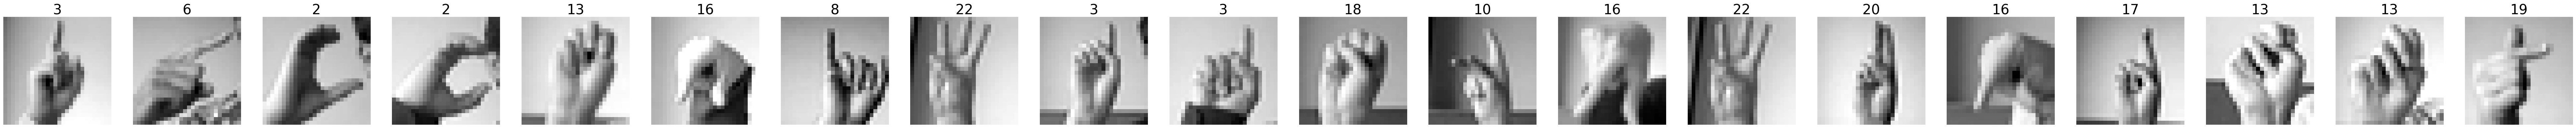

In [48]:
plt.figure(figsize=(100,100))
num_images = 20
for i in range(num_images):
	row = train_image[i]
	label = train_label[i]

	image = row.reshape(28,28)
	plt.subplot(1, num_images, i+1)
	plt.title(label, fontdict={'fontsize': 30})
	plt.axis('off')
	plt.imshow(image, cmap='gray')

In [49]:
train_image = train_image / 255
valid_image = valid_image / 255

In [50]:
#import tensorflow.keras as keras
import tensorflow as tf
keras=tf.keras
num_classes = 25
train_label = keras.utils.to_categorical(train_label, num_classes)
valid_label = keras.utils.to_categorical(valid_label, num_classes)


In [54]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#model = Sequential()
model=tf.keras.models.Sequential()
Dense=tf.keras.layers.Dense

model.add(Dense(units = 512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = num_classes, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dense_14 (Dense)            (None, 25)                12825     
                                                                 
Total params: 677,401
Trainable params: 677,401
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [57]:
model.fit(train_image, train_label, epochs=20, verbose=1, validation_data=(valid_image, valid_label))

Epoch 1/20
858/858 [==============================] - 11s 13ms/step - loss: 1.1396 - accuracy: 0.6119 - val_loss: 1.6067 - val_accuracy: 0.4841
Epoch 2/20
858/858 [==============================] - 10s 12ms/step - loss: 0.6704 - accuracy: 0.7708 - val_loss: 1.1283 - val_accuracy: 0.6747
Epoch 3/20
858/858 [==============================] - 9s 11ms/step - loss: 0.4448 - accuracy: 0.8559 - val_loss: 0.8514 - val_accuracy: 0.7489
Epoch 4/20
858/858 [==============================] - 9s 10ms/step - loss: 0.3155 - accuracy: 0.9027 - val_loss: 1.8153 - val_accuracy: 0.6728
Epoch 5/20
858/858 [==============================] - 10s 12ms/step - loss: 0.2607 - accuracy: 0.9263 - val_loss: 0.8191 - val_accuracy: 0.8224
Epoch 6/20
858/858 [==============================] - 9s 11ms/step - loss: 0.2268 - accuracy: 0.9415 - val_loss: 0.7979 - val_accuracy: 0.8544
Epoch 7/20
858/858 [==============================] - 11s 13ms/step - loss: 0.2070 - accuracy: 0.9516 - val_loss: 1.2356 - val_accuracy: 0.